In this notebook we will work with the MNIST dataset and the KNN approach.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.image as img
from PIL import Image

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape , y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Plotting each number once.

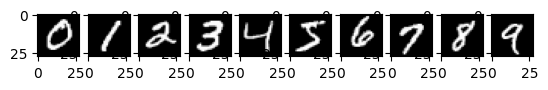

In [ ]:
for i in range(10):
  index = np.argwhere(y_train==i)[0]
  plt.subplot(1, 10, i+1)
  plt.imshow(np.reshape(x_train[index],(28,28)), cmap='gray')

# Are all pixels important?

Every image has a shape 28x28 pixels. Obviously, not all of them contain the number information, since the white pixels are the numbers and black pixels are the backgrounds. However we should not claim that, for example, the white pixels are more important, since the presence as well as the absense of color are both important. The question 'which pixels are more important' is too vague to answear clearly. We can only notice that sometimes the number is not perfectly centered in the image and in that context, then there is a part of the image that is not very important.

Reshaping arrays into vectors.

In [ ]:
x_train_v = x_train.reshape(-1,28*28)
x_test_v = x_test.reshape(-1,28*28)
x_train_v.shape , x_test_v.shape

((60000, 784), (10000, 784))

In [ ]:
possible_k = [5,15,51,int(np.ceil(np.sqrt(x_train_v.shape[0])))]
possible_k

[5, 15, 51, 245]

# Selection of K

In the following blocks we will evaluate the selection of parameter k.
For each possible k will fit a classifier and calculate train and test accuracies.

In [ ]:
acuuracies_train = []
accuracies_test = []
classifiers = []
for k in possible_k:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train_v,y_train)
  classifiers.append(knn)

  y_pred_train = knn.predict(x_train_v)
  train_accuracy = accuracy_score(y_train, y_pred_train)*100
  acuuracies_train.append(train_accuracy)
  print(f'k = {k} Train: Acc={train_accuracy:.2f}')

  y_pred_test = knn.predict(x_test_v)
  test_accuracy = accuracy_score(y_test, y_pred_test)*100
  accuracies_test.append(test_accuracy)
  print(f'k = {k} Test: Acc={test_accuracy:.2f}')
  print('----------')

k = 5 Train: Acc=98.19
k = 5 Test: Acc=96.88
----------
k = 15 Train: Acc=97.10
k = 15 Test: Acc=96.33
----------
k = 51 Train: Acc=95.32
k = 51 Test: Acc=95.33
----------
k = 245 Train: Acc=92.09
k = 245 Test: Acc=92.38
----------


Plot to evaluate the accuracy of each k.

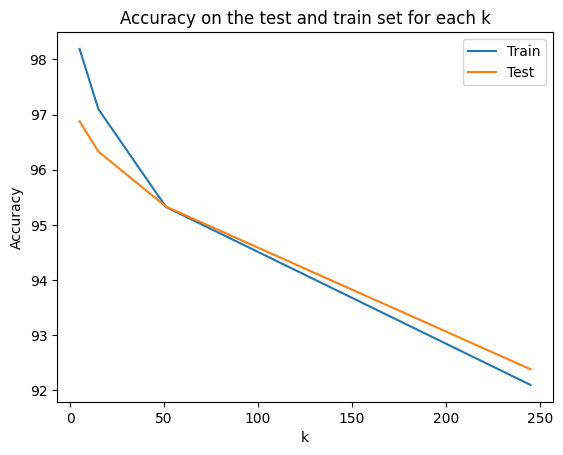

In [ ]:
plt.plot(possible_k,acuuracies_train, label = "Train")
plt.plot(possible_k,accuracies_test, label = "Test")
plt.legend()
plt.title('Accuracy on the test and train set for each k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

Scaling is an important step in image analysis. We will the value of each pixel in the range [0,1] by dividing with 255.

In [ ]:
x_train_scaled =x_train_v/255
x_test_scaled = x_test_v/255

No we will repeat the evaluation of the selection of k.

In [ ]:
acuuracies_train_scaled = []
accuracies_test_scaled = []
classifiers_scaled = []
for k in possible_k:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train_scaled,y_train)
  classifiers_scaled.append(knn)

  y_pred_train = knn.predict(x_train_scaled)
  train_accuracy = accuracy_score(y_train, y_pred_train)*100
  acuuracies_train_scaled.append(train_accuracy)
  print(f'k = {k} Scaled Train: Acc={train_accuracy:.2f}')

  y_pred_test = knn.predict(x_test_scaled)
  test_accuracy = accuracy_score(y_test, y_pred_test)*100
  accuracies_test_scaled.append(test_accuracy)
  print(f'k = {k} Scaled Test: Acc={test_accuracy:.2f}')

k = 5 Scaled Train: Acc=98.19
k = 5 Scaled Test: Acc=96.88
k = 15 Scaled Train: Acc=97.10
k = 15 Scaled Test: Acc=96.33
k = 51 Scaled Train: Acc=95.32
k = 51 Scaled Test: Acc=95.33
k = 245 Scaled Train: Acc=92.09
k = 245 Scaled Test: Acc=92.38


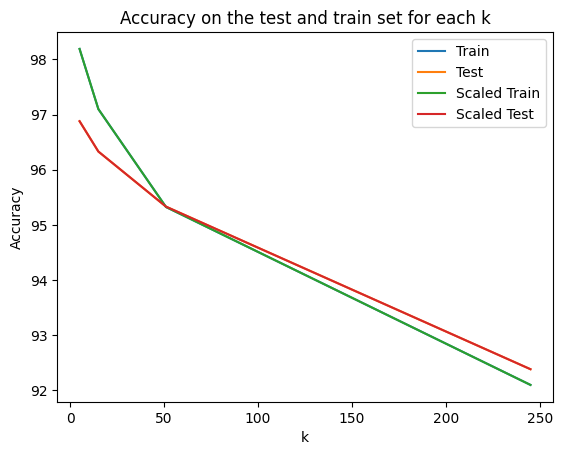

In [ ]:
plt.plot(possible_k,acuuracies_train, label = "Train")
plt.plot(possible_k,accuracies_test, label = "Test")
plt.plot(possible_k,acuuracies_train_scaled, label = "Scaled Train")
plt.plot(possible_k,accuracies_test_scaled, label = "Scaled Test")
plt.legend()
plt.title('Accuracy on the test and train set for each k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

Using Paint, we created a hand-written image with the number 8.

We will load it and test whether the best classifier can recognize the number.

In [ ]:
import cv2

In [ ]:
image= cv2.imread("test3.png",cv2.IMREAD_GRAYSCALE)

In [ ]:
image2 = cv2.resize(image,(28,28),interpolation=cv2.INTER_AREA)

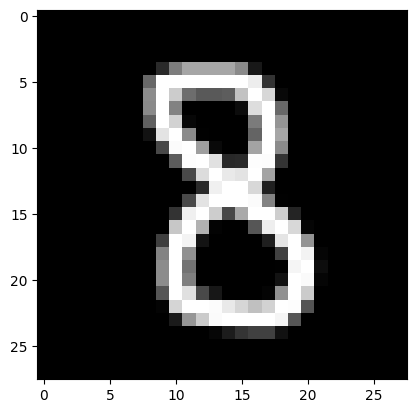

In [ ]:
plt.imshow(image2,cmap='grey')

In [ ]:
image2.shape

(28, 28)

In [ ]:
image_reshaped = image2.reshape(-1,28*28)
image_reshaped.shape

(1, 784)

In [ ]:
test_img_scaled = (image_reshaped/255).reshape(1,-1)

In [ ]:
test_img_scaled.shape

(1, 784)

In [ ]:
test_img_pred = knn.predict(test_img_scaled)
test_img_pred

array([8], dtype=uint8)